In [1]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd:float
    total_inr:float

In [2]:
def calculate_total_usd(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

def print_portfolio(state: PortfolioState) -> None:
    print(f"Amount in USD: {state['amount_usd']}")
    

In [6]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)
builder.add_node("calculate_total_node", calculate_total_usd)
builder.add_node("convert_to_inr_node", convert_to_inr)

builder.add_edge(START, "calculate_total_node")
builder.add_edge("calculate_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

graph = builder.compile()

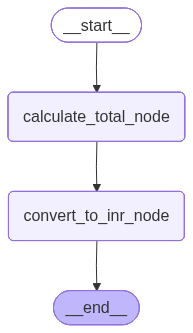

In [7]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


In [8]:
graph.invoke({"amount_usd": 100})

{'amount_usd': 100, 'total_usd': 108.0, 'total_inr': 9180.0}